In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

#print(d0)

L=df['label']

X=df.drop('label',axis=1)

print(X.head())
print(L.head())
print(X.shape)
print(L.shape)

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

In [4]:
#Data  Standardization
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(X)
print(standardised_data.shape)

(42000, 784)


In [5]:
sample_data = standardised_data

In [9]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print(pca_data.shape)

(42000, 2)


In [10]:
pca_data = np.vstack((pca_data.T,L)).T
print(pca_data.shape)

(42000, 3)


(42000, 3)


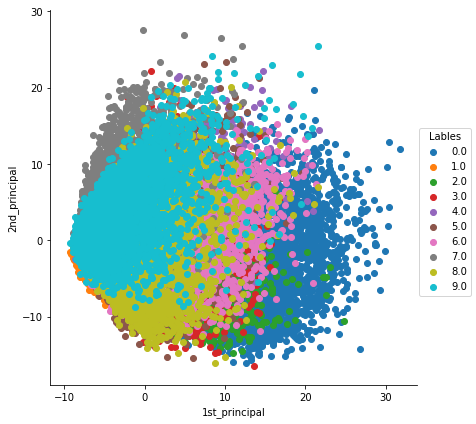

In [15]:
import seaborn as sn
%matplotlib inline
df_pca = pd.DataFrame(pca_data,columns = ("1st_principal","2nd_principal","Lables"))
print(df_pca.shape)
sn.FacetGrid(df_pca, hue = "Lables", size=6).map(plt.scatter ,"1st_principal","2nd_principal").add_legend()


** T-SNE Algorithm **

In [6]:
#Data  Standardization
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(X)
print(standardised_data.shape)

(42000, 784)


In [7]:
from sklearn.manifold import TSNE
import time

time_start = time.time()
model = TSNE(n_components = 2, verbose=1, random_state = 0,n_iter=2000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardised_data)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

print(tsne_data.shape)
tsne_data = np.vstack((tsne_data.T,label)).T
print(tsne_data.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 42000 samples in 23.859s...
[t-SNE] Computed neighbors for 42000 samples in 2095.578s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42000
[t-SNE] Computed conditional probabilities for sample 2000 / 42000
[t-SNE] Computed conditional probabilities for sample 3000 / 42000
[t-SNE] Computed conditional probabilities for sample 4000 / 42000
[t-SNE] Computed conditional probabilities for sample 5000 / 42000
[t-SNE] Computed conditional probabilities for sample 6000 / 42000
[t-SNE] Computed conditional probabilities for sample 7000 / 42000
[t-SNE] Computed conditional probabilities for sample 8000 / 42000
[t-SNE] Computed conditional probabilities for sample 9000 / 42000
[t-SNE] Computed conditional probabilities for sample 10000 / 42000
[t-SNE] Computed conditional probabilities for sample 11000 / 42000
[t-SNE] Computed conditional probabilities for sample 12000 / 42000
[t-SNE] Computed conditional probabilities for

NameError: name 'label' is not defined

In [8]:
tsne_data = np.vstack((tsne_data.T,L)).T
print(tsne_data.shape)

(42000, 3)


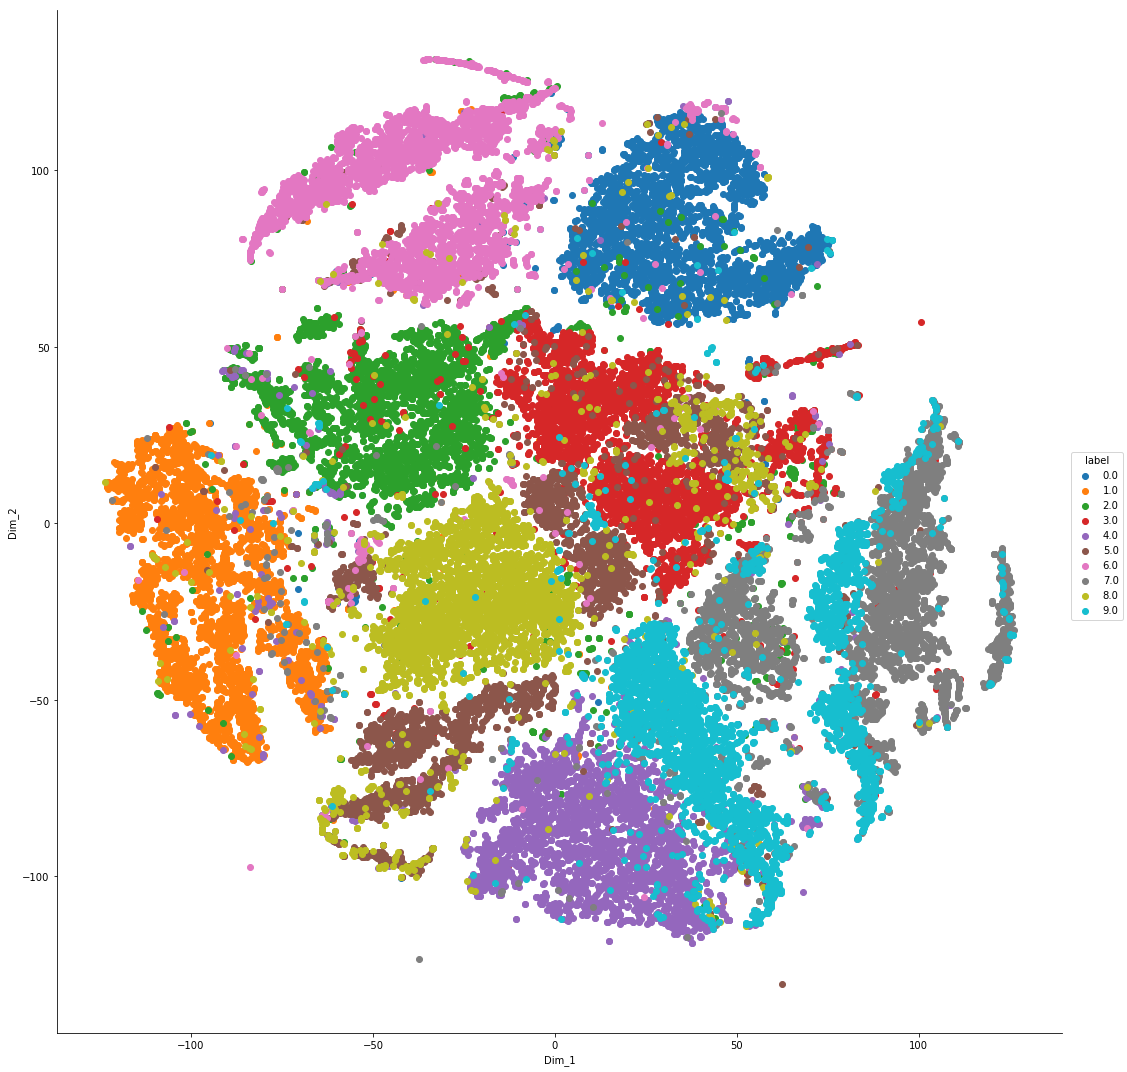

In [10]:
import seaborn as sns
df_tsne = pd.DataFrame(data=tsne_data , columns= ("Dim_1","Dim_2","label"))
sns.FacetGrid( data=df_tsne,hue ="label",size = 15).map(plt.scatter , "Dim_1","Dim_2").add_legend()
plt.show()